In [787]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

# Import Dataset

In [1086]:
xls_path = pd.ExcelFile('/Users/dileepsathyan/Documents/GitHub/Assignments/Vroom Virtusa/Analytics_Dataset.xlsx')
df_car_sales   = pd.read_excel(xls_path, 'car_sales')
df_car_details = pd.read_excel(xls_path, 'car_details')
df_car_claims  = pd.read_excel(xls_path, 'car_claims')

In [1087]:
df_car_sales.head()

,car_id_sales,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date
0,3421775349,ES,NaN,2021-04-29,2021-17,2021-05-14,1098,1,2021-05-31
1,5316743932,DE,NaN,2021-08-06,2021-31,2021-08-17,435,1,2021-08-31
2,5785159431,FR,NaN,2021-06-03,2021-22,2021-06-08,11028,0,NaN
3,7008763171,DE,NaN,2021-06-07,2021-23,2021-06-08,21100,1,NaN
4,1417558732,DE,NaN,2021-08-31,2021-35,2021-09-02,1943,1,2021-09-09


In [1088]:
df_car_details.head()

,car_id_details,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
0,5096178328,1,1,0,1039,1141,1049,0,1100,3534.0
1,1879501444,0,1,1,1039,1138,1049,0,0,3534.0
2,8375508078,1,1,1,1039,1139,0,0,0,1606.0
3,1266330246,0,1,0,1040,1139,1050,0,0,3534.0
4,9079520882,0,0,0,1039,1141,0,0,1100,3534.0


In [1089]:
df_car_claims.head()

,car_id_claims,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
0,7525691980,NaN,0,0,NaN,NaN
1,8543168465,C1AG79687,0,1,620.140528,CLOSED_FULLY_PROCESSED
2,7308726237,NaN,0,0,NaN,NaN
3,9070724843,NaN,0,0,NaN,NaN
4,6274074693,NaN,0,0,NaN,NaN


# Data Cleaning

## 1. Car_Sales Dataframe Cleaning

In [1090]:
df_car_sales.shape

(70512, 9)

In [1091]:
df_car_sales.drop_duplicates(inplace=True)
df_car_sales.shape

(69618, 9)

In [1092]:
# Delete the transport dates for the rows with transport_to_merchant == 0

df_car_sales['transport_date'].loc[(df_car_sales['transport_to_merchant'])== 0] = np.NaN
df_car_sales

/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,car_id_sales,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date
0,3421775349,ES,NaN,2021-04-29,2021-17,2021-05-14,1098,1,2021-05-31
1,5316743932,DE,NaN,2021-08-06,2021-31,2021-08-17,435,1,2021-08-31
2,5785159431,FR,NaN,2021-06-03,2021-22,2021-06-08,11028,0,NaN
3,7008763171,DE,NaN,2021-06-07,2021-23,2021-06-08,21100,1,NaN
4,1417558732,DE,NaN,2021-08-31,2021-35,2021-09-02,1943,1,2021-09-09
...,...,...,...,...,...,...,...,...,...
70507,8375003179,FR,NaN,2021-06-09,2021-23,2021-06-10,1533,0,NaN
70508,1788160938,BE,NaN,2021-07-05,2021-27,2021-07-19,3470,1,2021-07-22
70509,2990209110,FR,7489998.0,2021-03-02,2021-09,2021-03-03,4503,1,2021-03-12
70510,7825830294,DE,NaN,2021-04-10,2021-14,2021-04-13,1424,0,NaN


#### Convert to right datatypes

In [1093]:
# df_car_sales['car_id_sales'] = df_car_sales['car_id_sales'].astype('str')
# df_car_sales['merchant_id'] = df_car_sales['merchant_id'].astype('str')

df_car_sales['selling_date'] = pd.to_datetime(df_car_sales['selling_date'])
df_car_sales['payment_date'] = pd.to_datetime(df_car_sales['payment_date'])
df_car_sales['transport_date'] = pd.to_datetime(df_car_sales['transport_date'])

# Rename primary column
df_car_sales.rename(columns={'car_id_sales': 'car_id'}, inplace=True)

df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69618 entries, 0 to 70511
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 69618 non-null  int64         
 1   country                69618 non-null  object        
 2   merchant_id            19088 non-null  float64       
 3   selling_date           69618 non-null  datetime64[ns]
 4   selling_week           69618 non-null  object        
 5   payment_date           69618 non-null  datetime64[ns]
 6   sell_price             69618 non-null  int64         
 7   transport_to_merchant  69618 non-null  int64         
 8   transport_date         32625 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 5.3+ MB


In [1094]:
# Notice that the same car_ids are repeated for different merchant_ids

df_car_sales[df_car_sales['car_id'] == 5805619905]

,car_id,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date
24388,5805619905,BE,16191229.0,2021-07-31,2021-30,2021-08-03,22596,1,2021-08-04
46739,5805619905,BE,14307587.0,2021-07-31,2021-30,2021-08-03,22596,1,2021-08-04


In [1095]:
# There are merchant_ids who bought so many cars.

df_car_sales.merchant_id.value_counts()

8819318.0     823
5482442.0      97
2593085.0      92
6717821.0      64
2491964.0      62
             ... 
3451474.0       1
6902952.0       1
5854417.0       1
6903110.0       1
10485917.0      1
Name: merchant_id, Length: 9102, dtype: int64

In [1096]:
#### As long as we have no clarity on the correct Merchant who bought a car, it doesnt matter which record we delete.
#### Lets keep car_id only once and delete all following records for the sale.

df_car_sales = df_car_sales.drop_duplicates(subset='car_id', keep="first")
df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69551 entries, 0 to 70511
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 69551 non-null  int64         
 1   country                69551 non-null  object        
 2   merchant_id            19021 non-null  float64       
 3   selling_date           69551 non-null  datetime64[ns]
 4   selling_week           69551 non-null  object        
 5   payment_date           69551 non-null  datetime64[ns]
 6   sell_price             69551 non-null  int64         
 7   transport_to_merchant  69551 non-null  int64         
 8   transport_date         32597 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 5.3+ MB


### Handle missing datapoints in Car_Sales

In [1097]:
# For each country, find the average days for transport from the payment_date

df_cs_temp = df_car_sales[df_car_sales['transport_date'].notna()]
df_cs_temp['days_payment_to_transp'] = (df_cs_temp['transport_date'] - df_cs_temp['payment_date']).dt.days
df_cs_temp

<ipython-input-1097-5aa5afa4b28e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_temp['days_payment_to_transp'] = (df_cs_temp['transport_date'] - df_cs_temp['payment_date']).dt.days


,car_id,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date,days_payment_to_transp
0,3421775349,ES,NaN,2021-04-29,2021-17,2021-05-14,1098,1,2021-05-31,17
1,5316743932,DE,NaN,2021-08-06,2021-31,2021-08-17,435,1,2021-08-31,14
4,1417558732,DE,NaN,2021-08-31,2021-35,2021-09-02,1943,1,2021-09-09,7
5,3033323046,DE,12108955.0,2021-03-06,2021-09,2021-03-19,983,1,2021-03-30,11
8,2342272309,DE,NaN,2021-06-30,2021-26,2021-07-01,24336,1,2021-07-13,12
...,...,...,...,...,...,...,...,...,...,...
70493,5405810520,DE,NaN,2021-06-22,2021-25,2021-06-23,9000,1,2021-07-16,23
70497,2271497015,DE,NaN,2021-02-16,2021-07,2021-02-17,11889,1,2021-03-01,12
70499,7493564941,SE,2567469.0,2021-08-16,2021-33,2021-08-18,5266,1,2021-08-19,1
70508,1788160938,BE,NaN,2021-07-05,2021-27,2021-07-19,3470,1,2021-07-22,3


In [1098]:
avr_days_to_transp = df_cs_temp.groupby(['country'])['days_payment_to_transp'].mean().round()
avr_days_to_transp= avr_days_to_transp.to_dict()
avr_days_to_transp

{'AT': 10.0,
 'BE': 11.0,
 'DE': 11.0,
 'DK': 8.0,
 'ES': 7.0,
 'FI': 16.0,
 'FR': 12.0,
 'IT': 14.0,
 'NL': 21.0,
 'PL': 22.0,
 'PT': 6.0,
 'SE': 8.0}

In [1099]:
# Subset the cars trasp_to_merchant to fill the missing transport_date for them.

df_cs_transp = df_car_sales[df_car_sales['transport_to_merchant']==1]
df_cs_transp['days_to_transp'] = pd.to_timedelta(df_cs_transp['country'].map(avr_days_to_transp), 'days')
df_cs_transp['transport_date'] = df_cs_transp['transport_date'].fillna(df_cs_transp['payment_date'] + df_cs_transp['days_to_transp'])
df_cs_transp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35172 entries, 0 to 70509
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   car_id                 35172 non-null  int64          
 1   country                35172 non-null  object         
 2   merchant_id            8782 non-null   float64        
 3   selling_date           35172 non-null  datetime64[ns] 
 4   selling_week           35172 non-null  object         
 5   payment_date           35172 non-null  datetime64[ns] 
 6   sell_price             35172 non-null  int64          
 7   transport_to_merchant  35172 non-null  int64          
 8   transport_date         35172 non-null  datetime64[ns] 
 9   days_to_transp         35172 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2), timedelta64[ns](1)
memory usage: 3.0+ MB


<ipython-input-1099-00d41aa0048b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_transp['days_to_transp'] = pd.to_timedelta(df_cs_transp['country'].map(avr_days_to_transp), 'days')
<ipython-input-1099-00d41aa0048b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_transp['transport_date'] = df_cs_transp['transport_date'].fillna(df_cs_transp['payment_date'] + df_cs_transp['days_to_transp'])


In [1100]:
df_cs_transp = df_cs_transp.drop(columns=['days_to_transp'])
df_cs_transp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35172 entries, 0 to 70509
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 35172 non-null  int64         
 1   country                35172 non-null  object        
 2   merchant_id            8782 non-null   float64       
 3   selling_date           35172 non-null  datetime64[ns]
 4   selling_week           35172 non-null  object        
 5   payment_date           35172 non-null  datetime64[ns]
 6   sell_price             35172 non-null  int64         
 7   transport_to_merchant  35172 non-null  int64         
 8   transport_date         35172 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 2.7+ MB


In [1101]:
# Replace the non-NULL transport_date to original dataframe

idx = df_cs_transp.index
df_car_sales = df_car_sales.drop(idx)
df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34379 entries, 2 to 70511
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 34379 non-null  int64         
 1   country                34379 non-null  object        
 2   merchant_id            10239 non-null  float64       
 3   selling_date           34379 non-null  datetime64[ns]
 4   selling_week           34379 non-null  object        
 5   payment_date           34379 non-null  datetime64[ns]
 6   sell_price             34379 non-null  int64         
 7   transport_to_merchant  34379 non-null  int64         
 8   transport_date         0 non-null      datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 2.6+ MB


In [1102]:
# Append the cleaned dataframe to the the original

df_car_sales = df_car_sales.append(df_cs_transp)

# Reset index
df_car_sales.reset_index(drop=True, inplace=True)
df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69551 entries, 0 to 69550
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 69551 non-null  int64         
 1   country                69551 non-null  object        
 2   merchant_id            19021 non-null  float64       
 3   selling_date           69551 non-null  datetime64[ns]
 4   selling_week           69551 non-null  object        
 5   payment_date           69551 non-null  datetime64[ns]
 6   sell_price             69551 non-null  int64         
 7   transport_to_merchant  69551 non-null  int64         
 8   transport_date         35172 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 4.8+ MB


## Car_Details Dataframe Cleaning

In [1103]:
df_car_details.shape

(70512, 10)

In [1104]:
df_car_details.drop_duplicates(inplace=True)
df_car_details.shape

(70034, 10)

In [1105]:
df_car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70034 entries, 0 to 70511
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_id_details     70034 non-null  int64  
 1   has_tuning         70034 non-null  int64  
 2   has_airbags        70034 non-null  int64  
 3   has_alarm_system   70034 non-null  int64  
 4   fuel_type          70034 non-null  int64  
 5   gear_type          70034 non-null  int64  
 6   ac_type            70034 non-null  int64  
 7   xenon_light        70034 non-null  int64  
 8   navigation_system  70034 non-null  int64  
 9   radio_system       43494 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 5.9 MB


#### Convert to right datatypes

In [1106]:
# df_car_details['car_id_details'] = df_car_details['car_id_details'].astype('str')

# Rename primary column
df_car_details.rename(columns={'car_id_details': 'car_id'}, inplace=True)
df_car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70034 entries, 0 to 70511
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_id             70034 non-null  int64  
 1   has_tuning         70034 non-null  int64  
 2   has_airbags        70034 non-null  int64  
 3   has_alarm_system   70034 non-null  int64  
 4   fuel_type          70034 non-null  int64  
 5   gear_type          70034 non-null  int64  
 6   ac_type            70034 non-null  int64  
 7   xenon_light        70034 non-null  int64  
 8   navigation_system  70034 non-null  int64  
 9   radio_system       43494 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 5.9 MB


In [1107]:
## Check for duplicate records of same car_id

df_car_details[df_car_details.groupby('car_id')['car_id'].transform('size') > 1].sort_values(by='car_id').head(20)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
49297,1021854212,0,0,0,1039,1141,0,0,1100,3534.0
25281,1021854212,0,0,0,1040,1141,0,0,1100,3534.0
19591,1071192762,1,1,1,1040,1139,1050,1089,1100,3534.0
37616,1071192762,1,1,1,1039,1139,1050,1089,1100,3534.0
20260,1092285954,1,1,0,1039,1138,1050,0,1100,NaN
62249,1092285954,1,1,0,1039,1138,1050,0,0,NaN
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
50603,1130791238,1,1,0,1039,1141,1050,0,1100,1100.0
12934,1130791238,1,1,0,1040,1141,1050,0,1100,1100.0


In [1108]:
# Subset the records with duplicate car_ids

df_cd_dup = df_car_details[df_car_details.groupby('car_id')['car_id'].transform('size') > 1].sort_values(by='car_id')
df_cd_dup.sort_values(by='car_id').head(10)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
49297,1021854212,0,0,0,1039,1141,0,0,1100,3534.0
25281,1021854212,0,0,0,1040,1141,0,0,1100,3534.0
19591,1071192762,1,1,1,1040,1139,1050,1089,1100,3534.0
37616,1071192762,1,1,1,1039,1139,1050,1089,1100,3534.0
20260,1092285954,1,1,0,1039,1138,1050,0,1100,NaN
62249,1092285954,1,1,0,1039,1138,1050,0,0,NaN
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
50603,1130791238,1,1,0,1039,1141,1050,0,1100,1100.0
12934,1130791238,1,1,0,1040,1141,1050,0,1100,1100.0


In [1109]:
df_cd_dup.shape

(961, 10)

In [1110]:
# Remove the duplicated car_ids from original dataframe to make it a deduplicated df.

df_cd_deduped = df_car_details.drop(df_cd_dup.index)
df_cd_deduped.shape

(69073, 10)

##### Notice from the above subset that fule_type and navigation_system are the 2 fields which cause duplication.

###### 1. Those who differ only by fuel_type, lets keep the first record of each car_id and delete the rest.

In [1111]:
df_cd_dup = df_cd_dup.drop_duplicates(['car_id', 'navigation_system']).sort_values(by='car_id')

df_cd_dup.head(10)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
49297,1021854212,0,0,0,1039,1141,0,0,1100,3534.0
19591,1071192762,1,1,1,1040,1139,1050,1089,1100,3534.0
20260,1092285954,1,1,0,1039,1138,1050,0,1100,NaN
62249,1092285954,1,1,0,1039,1138,1050,0,0,NaN
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
50603,1130791238,1,1,0,1039,1141,1050,0,1100,1100.0
11699,1131021388,1,1,0,1039,1138,1050,0,0,3534.0
24110,1134904596,0,0,0,1040,1141,0,0,0,3534.0
48854,1175003748,1,1,0,1040,1138,1050,0,1100,1100.0


In [1112]:
df_cd_dup.shape

(792, 10)

In [1113]:
# Filter the uniques and append to the deduped dataframe & drop the uniques from the df_cd_dup

df_temp = df_cd_dup[df_cd_dup.groupby('car_id')['car_id'].transform('size') == 1]

df_cd_deduped = df_cd_deduped.append(df_temp)
df_cd_dup = df_cd_dup.drop(df_temp.index)
df_cd_dup.head(10)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
20260,1092285954,1,1,0,1039,1138,1050,0,1100,NaN
62249,1092285954,1,1,0,1039,1138,1050,0,0,NaN
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
54450,1189899240,0,0,0,1039,1141,0,0,0,3534.0
11135,1189899240,0,0,0,1040,1141,0,0,1100,3534.0
52138,1251496465,1,1,1,1039,1139,1050,1089,0,3534.0
67790,1251496465,1,1,1,1039,1139,1050,1089,1100,3534.0
8106,1257596002,0,0,0,1039,1141,0,0,0,3534.0
67243,1257596002,0,0,0,1039,1141,0,0,1100,3534.0


In [1114]:
df_cd_dup.shape

(628, 10)

##### 2. Those who differ only by navigation_system, lets keep the first record of each car_id and delete the rest.

In [1115]:
df_cd_dup = df_cd_dup.drop_duplicates(['car_id', 'fuel_type']).sort_values(by='car_id')

df_cd_dup.head(10)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
20260,1092285954,1,1,0,1039,1138,1050,0,1100,NaN
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
54450,1189899240,0,0,0,1039,1141,0,0,0,3534.0
11135,1189899240,0,0,0,1040,1141,0,0,1100,3534.0
52138,1251496465,1,1,1,1039,1139,1050,1089,0,3534.0
8106,1257596002,0,0,0,1039,1141,0,0,0,3534.0
69446,1257782013,1,1,0,1039,1138,0,0,0,NaN
29230,1257782013,1,1,0,1040,1138,0,0,1100,NaN
54861,1266182032,0,0,0,1039,1141,0,0,1100,3534.0


In [1116]:
# Filter the uniques and append to the deduped dataframe & drop the uniques from the df_cd_dup

df_temp = df_cd_dup[df_cd_dup.groupby('car_id')['car_id'].transform('size') == 1]

df_cd_deduped = df_cd_deduped.append(df_temp)
df_cd_dup = df_cd_dup.drop(df_temp.index)
df_cd_dup.head(10)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
54450,1189899240,0,0,0,1039,1141,0,0,0,3534.0
11135,1189899240,0,0,0,1040,1141,0,0,1100,3534.0
69446,1257782013,1,1,0,1039,1138,0,0,0,NaN
29230,1257782013,1,1,0,1040,1138,0,0,1100,NaN
64274,1550589125,0,0,0,1039,1141,0,0,0,3534.0
2198,1550589125,0,0,0,1040,1141,0,0,1100,3534.0
47017,1675413187,0,0,0,1039,1141,0,0,0,3534.0
47934,1675413187,0,0,0,1040,1141,0,0,1100,3534.0


In [1117]:
df_cd_dup.shape

(134, 10)

###### 3. Those who differ in both navigation_system & fuel_type, lets keep the record with 1100 as nav_system and delete the 0 values.

In [1118]:
df_cd_dup = df_cd_dup[df_cd_dup['navigation_system'] != 0]
df_cd_deduped = df_cd_deduped.append(df_cd_dup)
df_cd_deduped.shape

(69551, 10)

In [1119]:
df_car_details = df_cd_deduped

# Reset index
df_car_details.reset_index(drop=True, inplace=True)

df_car_details.shape

(69551, 10)

### Handle Missing datapoints in Car_Details

In [1120]:
df_car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69551 entries, 0 to 69550
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_id             69551 non-null  int64  
 1   has_tuning         69551 non-null  int64  
 2   has_airbags        69551 non-null  int64  
 3   has_alarm_system   69551 non-null  int64  
 4   fuel_type          69551 non-null  int64  
 5   gear_type          69551 non-null  int64  
 6   ac_type            69551 non-null  int64  
 7   xenon_light        69551 non-null  int64  
 8   navigation_system  69551 non-null  int64  
 9   radio_system       43151 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 5.3 MB


In [1121]:
# Notice that radio_system doesnt have any major correlation with the other fields in the dataframe
df_car_details.corr()

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
car_id,1.000000,0.004624,0.000627,0.000217,-0.000255,-0.001932,0.001381,-0.001102,0.001106,-0.000920
has_tuning,0.004624,1.000000,0.295046,0.068079,-0.006797,-0.181562,0.270314,0.096776,0.268147,-0.173203
has_airbags,0.000627,0.295046,1.000000,0.182746,0.028728,-0.621448,0.797482,0.184988,0.134463,-0.316304
has_alarm_system,0.000217,0.068079,0.182746,1.000000,0.006139,-0.058446,0.151926,0.181711,0.103301,-0.043394
fuel_type,-0.000255,-0.006797,0.028728,0.006139,1.000000,-0.079128,0.051082,0.042988,-0.040874,-0.025838
gear_type,-0.001932,-0.181562,-0.621448,-0.058446,-0.079128,1.000000,-0.523276,0.040913,0.091438,0.139118
ac_type,0.001381,0.270314,0.797482,0.151926,0.051082,-0.523276,1.000000,0.202947,0.165723,-0.341344
xenon_light,-0.001102,0.096776,0.184988,0.181711,0.042988,0.040913,0.202947,1.000000,0.275102,-0.202932
navigation_system,0.001106,0.268147,0.134463,0.103301,-0.040874,0.091438,0.165723,0.275102,1.000000,-0.403629
radio_system,-0.000920,-0.173203,-0.316304,-0.043394,-0.025838,0.139118,-0.341344,-0.202932,-0.403629,1.000000


In [1122]:
# Hence, fill the missing datapoints in the radio_system with 0 values.

df_car_details['radio_system'].fillna(0, inplace=True)
df_car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69551 entries, 0 to 69550
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_id             69551 non-null  int64  
 1   has_tuning         69551 non-null  int64  
 2   has_airbags        69551 non-null  int64  
 3   has_alarm_system   69551 non-null  int64  
 4   fuel_type          69551 non-null  int64  
 5   gear_type          69551 non-null  int64  
 6   ac_type            69551 non-null  int64  
 7   xenon_light        69551 non-null  int64  
 8   navigation_system  69551 non-null  int64  
 9   radio_system       69551 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 5.3 MB


## Car_Claims Dataframe Cleaning

In [1123]:
df_car_claims.shape

(70512, 6)

In [1124]:
df_car_claims.drop_duplicates(inplace=True)
df_car_claims.shape

(70504, 6)

In [1125]:
df_car_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70504 entries, 0 to 70511
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_id_claims    70504 non-null  int64  
 1   claim_number     19974 non-null  object 
 2   full_refunds     70504 non-null  int64  
 3   partial_refunds  70504 non-null  int64  
 4   voucher_amount   15173 non-null  float64
 5   claim_status     19974 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 3.8+ MB


#### Convert to right datatypes

In [1126]:
# df_car_claims['car_id_claims'] = df_car_claims['car_id_claims'].astype('str')
# df_car_claims['claim_number'] = df_car_claims['claim_number'].astype('str')

# Rename primary column
df_car_claims.rename(columns={'car_id_claims': 'car_id'}, inplace=True)

df_car_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70504 entries, 0 to 70511
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_id           70504 non-null  int64  
 1   claim_number     19974 non-null  object 
 2   full_refunds     70504 non-null  int64  
 3   partial_refunds  70504 non-null  int64  
 4   voucher_amount   15173 non-null  float64
 5   claim_status     19974 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 3.8+ MB


In [1127]:
df_car_claims.head()

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
0,7525691980,NaN,0,0,NaN,NaN
1,8543168465,C1AG79687,0,1,620.140528,CLOSED_FULLY_PROCESSED
2,7308726237,NaN,0,0,NaN,NaN
3,9070724843,NaN,0,0,NaN,NaN
4,6274074693,NaN,0,0,NaN,NaN


In [1128]:
# In case of full_refunds, there cannot be a voucher_amount.
# In other words, if the voucher_amount exists, fix the full_refunds fields values to 0.

idx = df_car_claims[df_car_claims['voucher_amount'].notnull() &
                   (df_car_claims['full_refunds'] == 1) & 
                   (df_car_claims['partial_refunds']== 1)].index

idx

Int64Index([ 3977,  5837,  7572,  7682,  8626,  9419, 11645, 12005, 12717,
            13239, 14913, 17342, 17667, 18612, 20365, 21321, 22204, 23521,
            24947, 25942, 28158, 28711, 30803, 30819, 31675, 31813, 31828,
            33221, 34505, 34681, 39289, 39766, 41513, 42285, 43052, 43709,
            43883, 44702, 44808, 45811, 46930, 49073, 49442, 50475, 51577,
            55796, 57965, 58991, 60969, 61978, 62810, 63861, 66466, 68141,
            69005],
           dtype='int64')

In [1129]:
# Adjusting the full_refunds values to 0 to perfect the dataframe

df_car_claims['full_refunds'][idx] = 0
df_car_claims.loc[idx].head()

<ipython-input-1129-7adf4c928e34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_claims['full_refunds'][idx] = 0


,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
3977,3252585712,C1YP17288,0,1,5744.003952,CLOSED_FULLY_PROCESSED
5837,8767210209,C2VN02471,0,1,668.721766,CLOSED_FULLY_PROCESSED
7572,5138342450,C1FH72285,0,1,440.810000,CLOSED_WAITING_FOR_MONEY_TO_BE_SHIPPED_AND_COM...
7682,4167620373,C1HV98906,0,1,642.250289,CLOSED_FULLY_PROCESSED
8626,3849154773,C2MK47916,0,1,1908.542760,CLOSED_FULLY_PROCESSED


In [1130]:
# For the REJECTED & CLOSED_NO_COMPENSATION statuses, set the full_refunds & partial refunds values to 0

idx = df_car_claims[df_car_claims['claim_status'].isin(['REJECTED', 'CLOSED_NO_COMPENSATION'])].index
idx

Int64Index([    9,    10,    35,    69,    71,    81,    82,    89,    99,
              118,
            ...
            70435, 70450, 70464, 70468, 70473, 70480, 70481, 70505, 70506,
            70508],
           dtype='int64', length=8436)

In [1131]:
# Adjusting the full_refunds values to 0 to perfect the dataframe

df_car_claims['full_refunds'][idx] = 0
df_car_claims['partial_refunds'][idx] = 0
df_car_claims.loc[idx].head()

<ipython-input-1131-04c8c9442846>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_claims['full_refunds'][idx] = 0
<ipython-input-1131-04c8c9442846>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_claims['partial_refunds'][idx] = 0


,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
9,6144821406,C1AG21631,0,0,694.447070,CLOSED_NO_COMPENSATION
10,6463026701,C1KU35864,0,0,11872.673452,REJECTED
35,1473256998,C1KU53944,0,0,2368.539984,REJECTED
69,5493234075,C1CM06061,0,0,NaN,REJECTED
71,6876098036,C1GC51986,0,0,1878.578578,REJECTED


In [1132]:
df_car_claims['claim_status'].value_counts()

CLOSED_FULLY_PROCESSED                                                    7910
REJECTED                                                                  5026
CLOSED_NO_COMPENSATION                                                    3410
CREATED                                                                   1262
CLOSED_ITEMS_FOUND_AND_SENT                                                783
CLOSED_WAITING_FOR_MORE_PROOF                                              348
PROOF_NOT_RECEIVED                                                         309
WAITING_FOR_SALES_TO_NEGOTIATE_WITH_THE_MERCHANT                           234
WAITING_FOR_LOCAL_OPS_MD_DECISION                                          159
MISSING_ITEMS_IN_PROGRESS                                                  134
2ND_DECISION_WAITING_FOR_SALES_TO_NEGOTIATE_WITH_MERCHANT                   77
NEW                                                                         72
WAITING_FOR_CLAIMS_TEAM_2_EVALUATION                

In [1133]:
status_codes = { np.NaN: 0,
                'CREATED': 1,
                'NEW_MISSING_ITEM_CLAIM': 1,
                'NEW': 1,

                'PROOF_NOT_RECEIVED': 2,
                'CLOSED_WAITING_FOR_MORE_PROOF': 3,
                'CLOSED_OVER_TIME_LIMIT': 4,
                'MORE_PROOF_RECEIVED': 5,
                'WAITING_FOR_CLAIMS_TEAM_1_EVALUATION': 6,
                '2ND_EVALUATION_CLAIMS_TEAM_2': 7,
                'WAITING_FOR_CLAIMS_TEAM_2_EVALUATION': 8,
                'WAITING_FOR_CARRIER_FEEDBACK': 9,
                'WAITING_FOR_LEGAL_TEAM': 10,

                'CLOSED_NO_COMPENSATION': 11,
                'REJECTED': 12,

                'MISSING_ITEMS_IN_PROGRESS': 13,
                'CLOSED_ITEMS_FOUND_AND_SENT': 14,

                'WAITING_FOR_SALES_TO_NEGOTIATE_WITH_THE_MERCHANT': 15,
                '2ND_DECISION_WAITING_FOR_SALES_TO_NEGOTIATE_WITH_MERCHANT': 16,
                'WAITING_FOR_LOCAL_OPS_MD_DECISION': 17,
                '2ND_DECISION_WAITING_FOR_LOCAL_OPS_MD_DECISION': 18,

                'CLOSED_CARRIER_WILL_COMPENSATE': 19,

                'CLOSED_WAITING_FOR_MERCHANT_BANK_DETAILS': 20, 
                'CLOSED_WAITING_FOR_CAR_DOCUMENTS_AND_BANK_DETAILS': 21,
                'WAITING_FOR_BANK_DETAILS_VALIDATION': 22,

                'CLOSED_WAITING_FOR_MONEY_TO_BE_SHIPPED_AND_COMPENSATION_TO_BE_RECORDED': 23,
                'CLOSED_WAITING_FOR_COMPENSATION_TO_BE_RECORDED': 24,
                'CLOSED_WAITING_FOR_DOCUMENTS': 25,
                'CLOSED_FULLY_PROCESSED': 26 }

In [1134]:
df_cc = df_car_claims.copy()
df_cc['status_code'] = df_cc['claim_status'].map(status_codes)
# df_cc = df_cc.sort_values(by=['car_id', 'status_code'])
df_cc.head()

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
0,7525691980,NaN,0,0,NaN,NaN,0
1,8543168465,C1AG79687,0,1,620.140528,CLOSED_FULLY_PROCESSED,26
2,7308726237,NaN,0,0,NaN,NaN,0
3,9070724843,NaN,0,0,NaN,NaN,0
4,6274074693,NaN,0,0,NaN,NaN,0


In [1135]:
# df_cc.groupby(['car_id'])['status_code'].max()

idx = df_cc.groupby(['car_id'])['status_code'].transform(max) == df_cc['status_code']
df_cc = df_cc[idx]
df_cc.shape

(69640, 7)

In [1136]:
# Identifying Pending Duplicates in the df

df_cc[df_cc['car_id']== 5149303881]

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
10787,5149303881,C4TK46454,0,1,3112.880206,CLOSED_FULLY_PROCESSED,26
19814,5149303881,C4TK46454,1,0,NaN,CLOSED_FULLY_PROCESSED,26


In [1137]:
df_cc['car_id'].nunique()

69551

In [1138]:
# Subset the records with duplicate car_ids

df_cc_dup = df_cc[df_cc.groupby('car_id')['car_id'].transform('size') > 1].sort_values(by='car_id')
df_cc_dup.head(10)

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
65138,1091480557,C1ZJ20861,0,1,3826.101648,CLOSED_FULLY_PROCESSED,26
4190,1091480557,C1ZJ20861,1,0,NaN,CLOSED_FULLY_PROCESSED,26
37116,1266182032,C1SS06287,0,1,2804.535297,CLOSED_FULLY_PROCESSED,26
6935,1266182032,C1SS06287,0,1,2149.457901,CLOSED_FULLY_PROCESSED,26
29497,1329241519,C2GR87979,0,1,705.036285,CLOSED_FULLY_PROCESSED,26
44485,1329241519,C2GR87979,0,1,482.114221,CLOSED_FULLY_PROCESSED,26
42278,1356214392,C1KB80609,0,0,2797.550353,REJECTED,12
25037,1356214392,C1KB80609,0,0,2337.572390,REJECTED,12
68046,1370035853,C2KX69437,0,1,1074.665772,CLOSED_FULLY_PROCESSED,26
31235,1370035853,C2KX69437,0,1,1394.864155,CLOSED_FULLY_PROCESSED,26


In [1139]:
df_cc_dup.shape

(177, 7)

In [1140]:
# Remove the duplicated car_ids from original dataframe to make it a deduplicated df.

df_cc_deduped = df_cc.drop(df_cc_dup.index)
df_cc_deduped.shape

(69463, 7)

In [1141]:
df_cc_dup['car_id'].nunique()

88

In [1142]:
df_cc_deduped['car_id'].nunique()

69463

##### Noticed that there are duplicate records with same claim_status
##### 1. Lets keep the record with voucher_amount for the duplicated records.

In [1143]:
df_cd_dup.shape

(67, 10)

In [1144]:
# 1a. Before deleting the rows with NULL voucher_amount, 
#     make sure that no duplicated car_ids have NULL values in both of the rows

df_cc_dup[df_cc_dup['voucher_amount'].isnull()]['car_id'].value_counts()

2802433468    2
9320910782    1
2818110547    1
2612408606    1
3855907037    1
7363990747    1
5036405350    1
4191587287    1
7151950304    1
8813163856    1
4427773773    1
3539094478    1
3842127670    1
4922195103    1
5149303881    1
7348849733    1
4065361055    1
4309735904    1
6974366625    1
4566417827    1
7613645214    1
5570835365    1
3096043603    1
5239366824    1
5755284393    1
4197008170    1
7096519625    1
1951678892    1
1091480557    1
9565824175    1
3157164086    1
1993742522    1
4998841339    1
9336612599    1
Name: car_id, dtype: int64

In [1145]:
df_cc_dup[df_cc_dup['car_id']== 2802433468]

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
60052,2802433468,C1CJ23334,0,0,NaN,CREATED,1
10175,2802433468,C1CJ23334,0,0,NaN,NEW,1


In [1146]:
# Since there exists 1 record which has NULL values in both of its rows, 
# lets first clean it to take 1 row and append to the deduped dataframe.

df_cc_deduped = df_cc_deduped.append(df_cc_dup.loc[[60052]])
df_cc_deduped.shape

(69464, 7)

In [1147]:
# Now drop the both rows of the car_id from dup dataframe.

df_cc_dup = df_cc_dup.drop([60052, 10175])
df_cc_dup.shape

(175, 7)

In [1148]:
df_cc_dup.head()

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
65138,1091480557,C1ZJ20861,0,1,3826.101648,CLOSED_FULLY_PROCESSED,26
4190,1091480557,C1ZJ20861,1,0,NaN,CLOSED_FULLY_PROCESSED,26
37116,1266182032,C1SS06287,0,1,2804.535297,CLOSED_FULLY_PROCESSED,26
6935,1266182032,C1SS06287,0,1,2149.457901,CLOSED_FULLY_PROCESSED,26
29497,1329241519,C2GR87979,0,1,705.036285,CLOSED_FULLY_PROCESSED,26


In [1149]:
df_cc_dup.to_excel('df_cc_dup.xlsx')

In [1150]:
# 1b. Now go on and delete the rows with NULL values in voucher_amount in the duplicated dataframe.

idx = df_cc_dup[df_cc_dup['voucher_amount'].isnull()].index

df_cc_dup = df_cc_dup.drop(idx)
df_cc_dup.shape

(142, 7)

In [1151]:
# Append the unique rows to dedupted dataframe

df_temp = df_cc_dup[df_cc_dup.groupby('car_id')['car_id'].transform('size') == 1]
df_cc_deduped = df_cc_deduped.append(df_temp)

# Drop the deduped df from the duplicate dataframe
df_cc_dup = df_cc_dup.drop(df_temp.index)
df_cc_dup.shape

(109, 7)

In [1152]:
df_cc_dup.head()

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
37116,1266182032,C1SS06287,0,1,2804.535297,CLOSED_FULLY_PROCESSED,26
6935,1266182032,C1SS06287,0,1,2149.457901,CLOSED_FULLY_PROCESSED,26
29497,1329241519,C2GR87979,0,1,705.036285,CLOSED_FULLY_PROCESSED,26
44485,1329241519,C2GR87979,0,1,482.114221,CLOSED_FULLY_PROCESSED,26
42278,1356214392,C1KB80609,0,0,2797.550353,REJECTED,12


In [1153]:
# 2. Now voucher_amount field contains only valid amounts. Lets keep the rows with max amounts and drop the rest.

idx = df_cc_dup.groupby(['car_id'])['voucher_amount'].transform(max) == df_cc_dup['voucher_amount']
df_cc_dup = df_cc_dup[idx]
df_cc_dup.shape

(54, 7)

In [1154]:
# Append all the deduped rows to the 

df_cc_deduped = df_cc_deduped.append(df_cc_dup)
df_car_claims = df_cc_deduped

# Reset index
df_car_claims.reset_index(drop=True, inplace=True)

df_car_claims.shape

(69551, 7)

In [1155]:
df_car_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69551 entries, 0 to 69550
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_id           69551 non-null  int64  
 1   claim_number     19021 non-null  object 
 2   full_refunds     69551 non-null  int64  
 3   partial_refunds  69551 non-null  int64  
 4   voucher_amount   14751 non-null  float64
 5   claim_status     19021 non-null  object 
 6   status_code      69551 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 3.7+ MB


### Handle missing datapoints in Car_Claims

In [1156]:
# Missing Voucher_Amounts to be filled by 0 values
df_car_claims['voucher_amount'].fillna(0, inplace=True)

# Missing claim_status means there is no claim for the sale. Hence fill in with 'NO_CLAIM_RAISED'
df_car_claims['claim_status'].fillna('NO_CLAIM_RAISED', inplace=True)

# Status_code field is not necessary at this stage. Hence drop the field for now.
df_car_claims.drop('status_code', axis=1, inplace=True)
df_car_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69551 entries, 0 to 69550
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_id           69551 non-null  int64  
 1   claim_number     19021 non-null  object 
 2   full_refunds     69551 non-null  int64  
 3   partial_refunds  69551 non-null  int64  
 4   voucher_amount   69551 non-null  float64
 5   claim_status     69551 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 3.2+ MB


# Combine the dataframes to 1

In [1157]:
df_car_sales.shape

(69551, 9)

In [1158]:
df_car_details.shape

(69551, 10)

In [1159]:
df_car_claims.shape

(69551, 6)

In [1160]:
# Merging all the 3 dataframes into 1 master

df_master = df_car_sales.merge(df_car_details, on='car_id').merge(df_car_claims, on='car_id')
df_master.shape

(69551, 23)

In [1161]:
df_master.head()

,car_id,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date,has_tuning,...,gear_type,ac_type,xenon_light,navigation_system,radio_system,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
0,5785159431,FR,NaN,2021-06-03,2021-22,2021-06-08,11028,0,NaT,0,...,1138,1050,0,1100,3534.0,NaN,0,0,0.000000,NO_CLAIM_RAISED
1,9820548955,FR,NaN,2021-08-31,2021-35,2021-09-02,8423,0,NaT,0,...,1138,1050,0,1100,1100.0,NaN,0,0,0.000000,NO_CLAIM_RAISED
2,7062041313,DE,10443420.0,2021-05-14,2021-19,2021-05-17,5800,0,NaT,0,...,1141,0,0,1100,3534.0,C1GW00315,0,0,911.334251,REJECTED
3,2944034946,ES,NaN,2021-07-21,2021-29,2021-07-29,4000,0,NaT,1,...,1138,0,0,0,3534.0,NaN,0,0,0.000000,NO_CLAIM_RAISED
4,9307814133,DE,NaN,2021-02-17,2021-07,2021-02-23,4950,0,NaT,0,...,1141,0,0,0,3534.0,NaN,0,0,0.000000,NO_CLAIM_RAISED


# Data Exploration

In [1162]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69551 entries, 0 to 69550
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 69551 non-null  int64         
 1   country                69551 non-null  object        
 2   merchant_id            19021 non-null  float64       
 3   selling_date           69551 non-null  datetime64[ns]
 4   selling_week           69551 non-null  object        
 5   payment_date           69551 non-null  datetime64[ns]
 6   sell_price             69551 non-null  int64         
 7   transport_to_merchant  69551 non-null  int64         
 8   transport_date         35172 non-null  datetime64[ns]
 9   has_tuning             69551 non-null  int64         
 10  has_airbags            69551 non-null  int64         
 11  has_alarm_system       69551 non-null  int64         
 12  fuel_type              69551 non-null  int64         
 13  g

In [1163]:
df_master.describe()

,car_id,merchant_id,sell_price,transport_to_merchant,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system,full_refunds,partial_refunds,voucher_amount
count,6.955100e+04,1.902100e+04,69551.000000,69551.000000,69551.000000,69551.000000,69551.000000,69551.000000,69551.000000,69551.00000,69551.000000,69551.000000,69551.000000,69551.000000,69551.000000,69551.000000
mean,5.482666e+09,8.386137e+06,7456.351828,0.505701,0.386882,0.842748,0.159149,1010.396759,1138.892971,845.42540,173.110149,402.383862,1814.948786,0.008440,0.116548,409.185390
std,2.598456e+09,4.728563e+06,8542.072637,0.499971,0.487040,0.364040,0.365818,171.698535,1.251686,415.52003,398.186022,529.824039,1640.071469,0.091481,0.320883,1278.060098
min,1.000145e+09,1.211960e+05,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1138.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.238701e+09,4.294300e+06,2251.500000,0.000000,0.000000,1.000000,0.000000,1039.000000,1138.000000,1049.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.464531e+09,8.674186e+06,4824.000000,1.000000,0.000000,1.000000,0.000000,1040.000000,1138.000000,1050.00000,0.000000,0.000000,1100.000000,0.000000,0.000000,0.000000
75%,7.729173e+09,1.236666e+07,9482.500000,1.000000,1.000000,1.000000,0.000000,1040.000000,1139.000000,1050.00000,0.000000,1100.000000,3534.000000,0.000000,0.000000,0.000000
max,9.999930e+09,1.676935e+07,173000.000000,1.000000,1.000000,1.000000,1.000000,1040.000000,1141.000000,1050.00000,1089.000000,1100.000000,3534.000000,1.000000,1.000000,50331.039294


In [1164]:
df_master['claim_status'].value_counts()[1:]

# F: Most of the cases (8013) are either REJECTED or CLOSED_NO_COMP at the end.

CLOSED_FULLY_PROCESSED                                                    7824
REJECTED                                                                  4755
CLOSED_NO_COMPENSATION                                                    3258
CREATED                                                                    895
CLOSED_ITEMS_FOUND_AND_SENT                                                758
CLOSED_WAITING_FOR_MORE_PROOF                                              335
PROOF_NOT_RECEIVED                                                         301
WAITING_FOR_SALES_TO_NEGOTIATE_WITH_THE_MERCHANT                           226
WAITING_FOR_LOCAL_OPS_MD_DECISION                                          158
MISSING_ITEMS_IN_PROGRESS                                                  131
2ND_DECISION_WAITING_FOR_SALES_TO_NEGOTIATE_WITH_MERCHANT                   76
NEW                                                                         65
WAITING_FOR_CLAIMS_TEAM_2_EVALUATION                

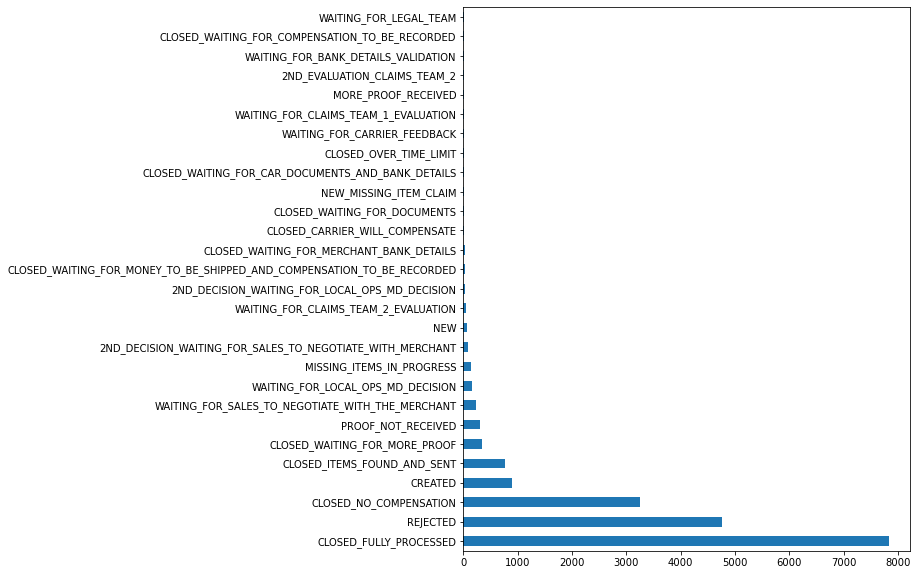

In [1165]:
df_master['claim_status'].value_counts()[1:].plot(kind='barh', figsize=(8, 10))

In [1166]:
# We need to group the statuses into 4 categories

# 1. NOT_CLAIMED
# 2. REJECTED ( REJECTED / CLOSED_NO_COMP)
# 3. CLAIM_PAID
# 4. IN_PROGRESS

# So there is 1 category where the missing items are sent to customers. 
# Need to understand if it costs anything to Vroom..

df_master[df_master['claim_status']== 'CLOSED_ITEMS_FOUND_AND_SENT']['voucher_amount'].sum()

0.0

In [1167]:
df_master[df_master['claim_status']== 'CLOSED_NO_COMPENSATION']['voucher_amount'].sum()

4961354.536353906

In [1168]:
# F: When the missing items are found and sent to customer there are no vouchers issues., hence no cost involved.

### Feature Engineering

In [1169]:
# Create a new field: has_claim_raised
# No matter what the result is, if the claim was raised for a sale, flag it 1 else 0.

df_master['has_claim_raised'] = np.where(df_master['claim_number'].isnull(), 0, 1)
df_master[['car_id', 'claim_number', 'has_claim_raised']]

,car_id,claim_number,has_claim_raised
0,5785159431,NaN,0
1,9820548955,NaN,0
2,7062041313,C1GW00315,1
3,2944034946,NaN,0
4,9307814133,NaN,0
...,...,...,...
69546,5405810520,NaN,0
69547,2271497015,NaN,0
69548,7493564941,C1KC93377,1
69549,1788160938,NaN,0


In [1170]:
# Create a new field: refund_amount

# A. In case of full refunds: refund_amount = selling_price of the car
# B. In case of partial_refunds: refund_amount = voucher_amount (condition:REJECTED cases wont get voucher_amount)

def refund_amount(row):
    if row['has_claim_raised'] == 0:
        return 0
    else:
        if row['full_refunds'] == 1:
            return row['sell_price']
        else:
            if (row['claim_status'] == 'REJECTED') or (row['claim_status'] == 'CLOSED_NO_COMPENSATION'):
                return 0
            else:
                return row['voucher_amount']

            
df_master['refund_amount'] = df_master.apply(lambda row: refund_amount(row), axis=1)

In [1171]:
df_master[['car_id', 'has_claim_raised', 'full_refunds', 'partial_refunds', 
           'sell_price', 'voucher_amount', 'claim_status', 'refund_amount']].head(20)

,car_id,has_claim_raised,full_refunds,partial_refunds,sell_price,voucher_amount,claim_status,refund_amount
0,5785159431,0,0,0,11028,0.000000,NO_CLAIM_RAISED,0.000000
1,9820548955,0,0,0,8423,0.000000,NO_CLAIM_RAISED,0.000000
2,7062041313,1,0,0,5800,911.334251,REJECTED,0.000000
3,2944034946,0,0,0,4000,0.000000,NO_CLAIM_RAISED,0.000000
4,9307814133,0,0,0,4950,0.000000,NO_CLAIM_RAISED,0.000000
5,3309623348,0,0,0,2550,0.000000,NO_CLAIM_RAISED,0.000000
6,9102199589,1,0,0,11742,0.000000,MORE_PROOF_RECEIVED,0.000000
7,9501506763,0,0,0,6827,0.000000,NO_CLAIM_RAISED,0.000000
8,6000550454,0,0,0,11742,0.000000,NO_CLAIM_RAISED,0.000000
9,7469892334,1,0,1,9390,2180.590005,CLOSED_FULLY_PROCESSED,2180.590005
